In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv("../iris.csv")
df.drop(['Id'], axis=1, inplace=True)
print(df)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


In [5]:
print(df.describe())



       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [6]:
df[df['Species'] == 'Iris-setosa'].describe()
df[df['Species'] == 'Iris-versicolor'].describe()
df[df['Species'] == 'Iris-virginica'].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [7]:
def plot_dist_by_attr(df):
    sns.set(style='darkgrid')
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

    sns.histplot(data=df['SepalLengthCm'], color='coral', kde=True, ax=ax[0,0])
    sns.histplot(data=df['SepalWidthCm'], color='cornflowerblue', kde=True, ax=ax[0,1])
    sns.histplot(data=df['PetalLengthCm'], color='violet', kde=True, ax=ax[1,0])
    sns.histplot(data=df['PetalWidthCm'], color='limegreen', kde=True, ax=ax[1,1])

    fig.suptitle(t="Distribution of Attributes")
    plt.show()

In [8]:
def kde_plot(df):
    sns.set(style='darkgrid')
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

    sns.histplot(data=df, x='SepalLengthCm', hue='Species', ax=ax[0,0])
    sns.histplot(data=df, x='SepalWidthCm', hue='Species', ax=ax[0,1])
    sns.histplot(data=df, x='PetalLengthCm', hue='Species', ax=ax[1,0])
    sns.histplot(data=df, x='PetalWidthCm', hue='Species', ax=ax[1,1])
    
    fig.suptitle(t="Distribution of Attributes by Species")
    plt.show()




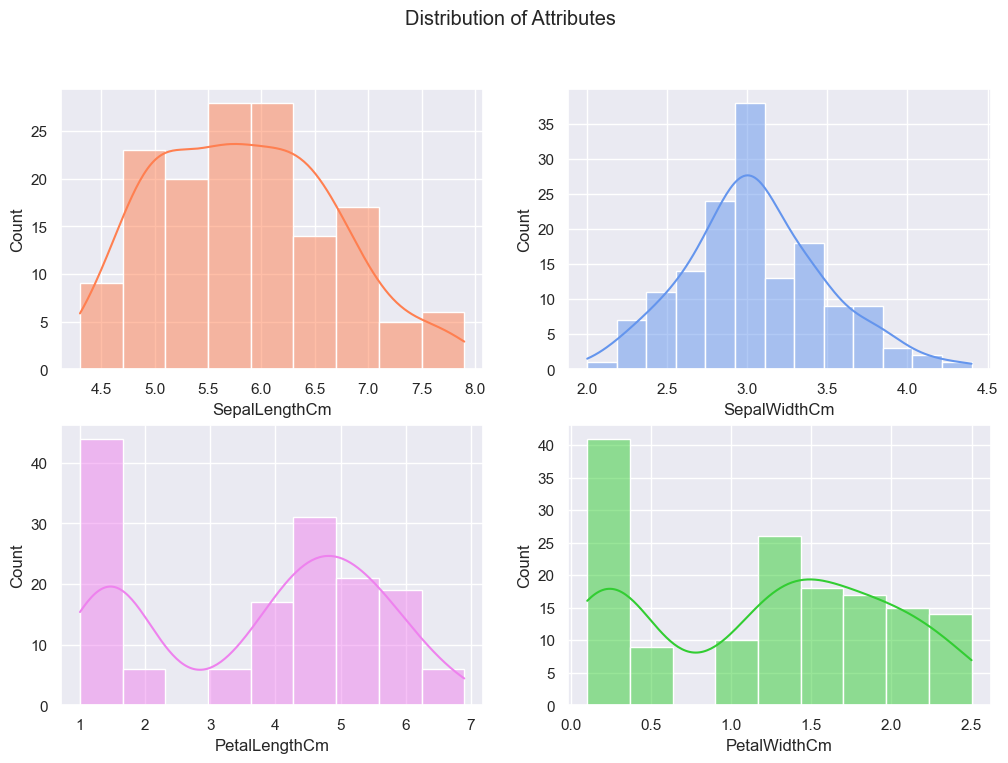

In [9]:
plot_dist_by_attr(df)

In [ ]:
kde_plot(df)

In [44]:
def Kmeans(X, n_clusters):
    algo = KMeans(n_clusters=n_clusters, random_state=10)
    clusters = algo.fit_predict(X)

    return clusters

In [52]:
X = df.drop(['Species'], axis=1)
#print(X)
X = X.values
#print(X)

clusters = Kmeans(X, n_clusters=3)
print(f'Clustering results:{clusters}')

print(f'len: {len(clusters)}')

Clustering results:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
len: 150


In [3]:
def plot_cluster_results(X, clusters):

    sns.set(style='darkgrid')

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

    for i in np.unique(clusters):
        bool_arr = (clusters == i)
        sns.scatterplot(x=X[bool_arr,0], y=X[bool_arr,1],label='Cluster ' + str(i+1), ax=ax[0,0])
        sns.scatterplot(x=X[bool_arr,2], y=X[bool_arr,3],label='Cluster ' + str(i+1), ax=ax[0,1])
        sns.scatterplot(x=X[bool_arr,0], y=X[bool_arr,2],label='Cluster ' + str(i+1), ax=ax[1,0])
        sns.scatterplot(x=X[bool_arr,1], y=X[bool_arr,3],label='Cluster ' + str(i+1), ax=ax[1,1])

    ax[0,0].set_xlabel('SepalLengthCm')
    ax[0,0].set_ylabel('SepalWidthCm')
    ax[0,0].set_title('Clustering (View 1)')

    ax[0,1].set_xlabel('PetalLengthCm')
    ax[0,1].set_ylabel('PetalWidthCm')
    ax[0,1].set_title('Clustering (View 2)')

    ax[1,0].set_xlabel('SepalLengthCm')
    ax[1,0].set_ylabel('PetalLengthCm')
    ax[1,0].set_title('Clustering (View 3)')

    ax[1,1].set_xlabel('SepalWidthCm')
    ax[1,1].set_ylabel('PetalWidthCm')
    ax[1,1].set_title('Clustering (View 4)')

    plt.tight_layout(pad=3)
    fig.suptitle(t='Clustering Results')
    plt.show()

In [2]:
plot_cluster_results(X=X, clusters=clusters)

NameError: name 'plot_cluster_results' is not defined

In [56]:
def plot_wcss(X):   

    wcss = []

    # trying kmeans for k=1 to k=10

    for i in range(1, 11):

        kmeans = KMeans(n_clusters=i, init='k-means++')

        kmeans.fit(X=X)

        wcss.append(kmeans.inertia_)

    sns.set(style='darkgrid')

    sns.lineplot(x=range(1,11), y=wcss)    

    plt.title('Finding Optimal No. of Clusters')

    plt.xlabel('Number of clusters')

    plt.ylabel('WCSS')  # within cluster sum of squares

    plt.show()

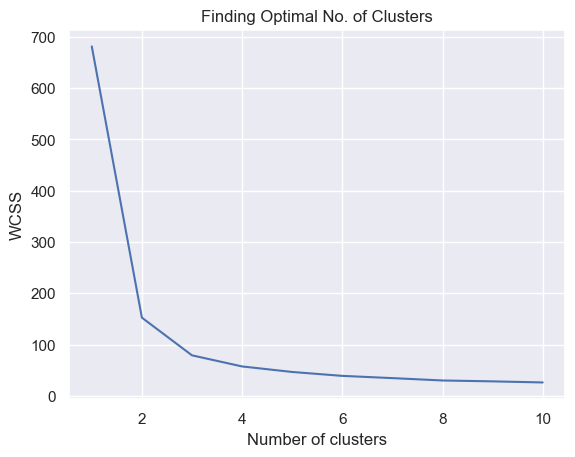

In [57]:
plot_wcss(X=X)